# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [137]:
print("Для вопроизводимости случайности устанавливаем фиксированное значение зерна генератора случайных чисел")

Для вопроизводимости случайности устанавливаем фиксированное значение зерна генератора случайных чисел


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [138]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [4]:
# your code here
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [5]:
# your code here
pd.concat([df_test.head(5),df_test.tail(5)],axis=0)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>.
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [139]:
#статистика для train
df_train.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [7]:
#статистика для test
df_test.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [8]:
# your code here
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [140]:
print(f'Пропуски содержат следующие колонки: {", ".join(df_train.columns[df_train.isna().sum() > 0].tolist())}')

Пропуски содержат следующие колонки: mileage, engine, max_power, torque, seats


(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [141]:
# your code here
duplicates_train = df_train.drop('selling_price',axis=1).duplicated()
print(f'Одинаковое признаковое описание в train имеют {duplicates_train.sum()} строк.')

Одинаковое признаковое описание в train имеют 1159 строк.


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [11]:
# your code here
df_train[duplicates_train]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [142]:
# your code here
df_train = df_train[~duplicates_train]

In [143]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [144]:
# your code here
df_train.reset_index(drop=True, inplace=True)
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая:
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``.
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [145]:
df_train['mileage'] = pd.to_numeric(df_train['mileage'].replace('kmpl|km/kg','', regex=True).str.strip()).astype(float)
df_test['mileage'] = pd.to_numeric(df_test['mileage'].replace('kmpl|km/kg','', regex=True).str.strip()).astype(float)

df_train['engine'] = pd.to_numeric(df_train['engine'].replace('CC','', regex=True).str.strip()).astype(float)
df_test['engine'] = pd.to_numeric(df_test['engine'].replace('CC','', regex=True).str.strip()).astype(float)

df_train['max_power'] = pd.to_numeric(df_train['max_power'].replace('bhp','', regex=True).str.strip()).astype(float)
df_test['max_power'] = pd.to_numeric(df_test['max_power'].replace('bhp','', regex=True).str.strip()).astype(float)

In [146]:
df_train.drop(['torque'],axis=1, inplace=True)
df_test.drop(['torque'],axis=1, inplace=True)

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [147]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='median')
cols = ['mileage','engine','max_power','seats']
imp.fit(df_train[cols])
df_train[cols] = imp.transform(df_train[cols])
df_test[cols] = imp.transform(df_test[cols])

In [18]:
print(f'Количество пропусков на train = {df_train.isna().sum().sum()}')
print(f'Количество пропусков на test = {df_test.isna().sum().sum()}')

Количество пропусков на train = 0
Количество пропусков на test = 0


In [148]:
import pickle

# Сохранение объекта SimpleImputee в файл для дальнейшего использования в сервисе FastApi
with open("Imputer.pickle", "wb") as f:
    pickle.dump(imp, f)


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [149]:
df_train = df_train.astype({'engine': 'int', 'seats': 'int'})
df_test = df_test.astype({'engine': 'int', 'seats': 'int'})

In [ ]:
print("Несмотря на то, что количество сидений является числовой величиной, между ними нет даже отношения порядка. Поскольку машина с 2 сиденьями не является всегда дешевле, чем с 5.")

In [25]:
df_train.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int64
max_power        float64
seats              int64
dtype: object

In [26]:
df_test.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int64
max_power        float64
seats              int64
dtype: object

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

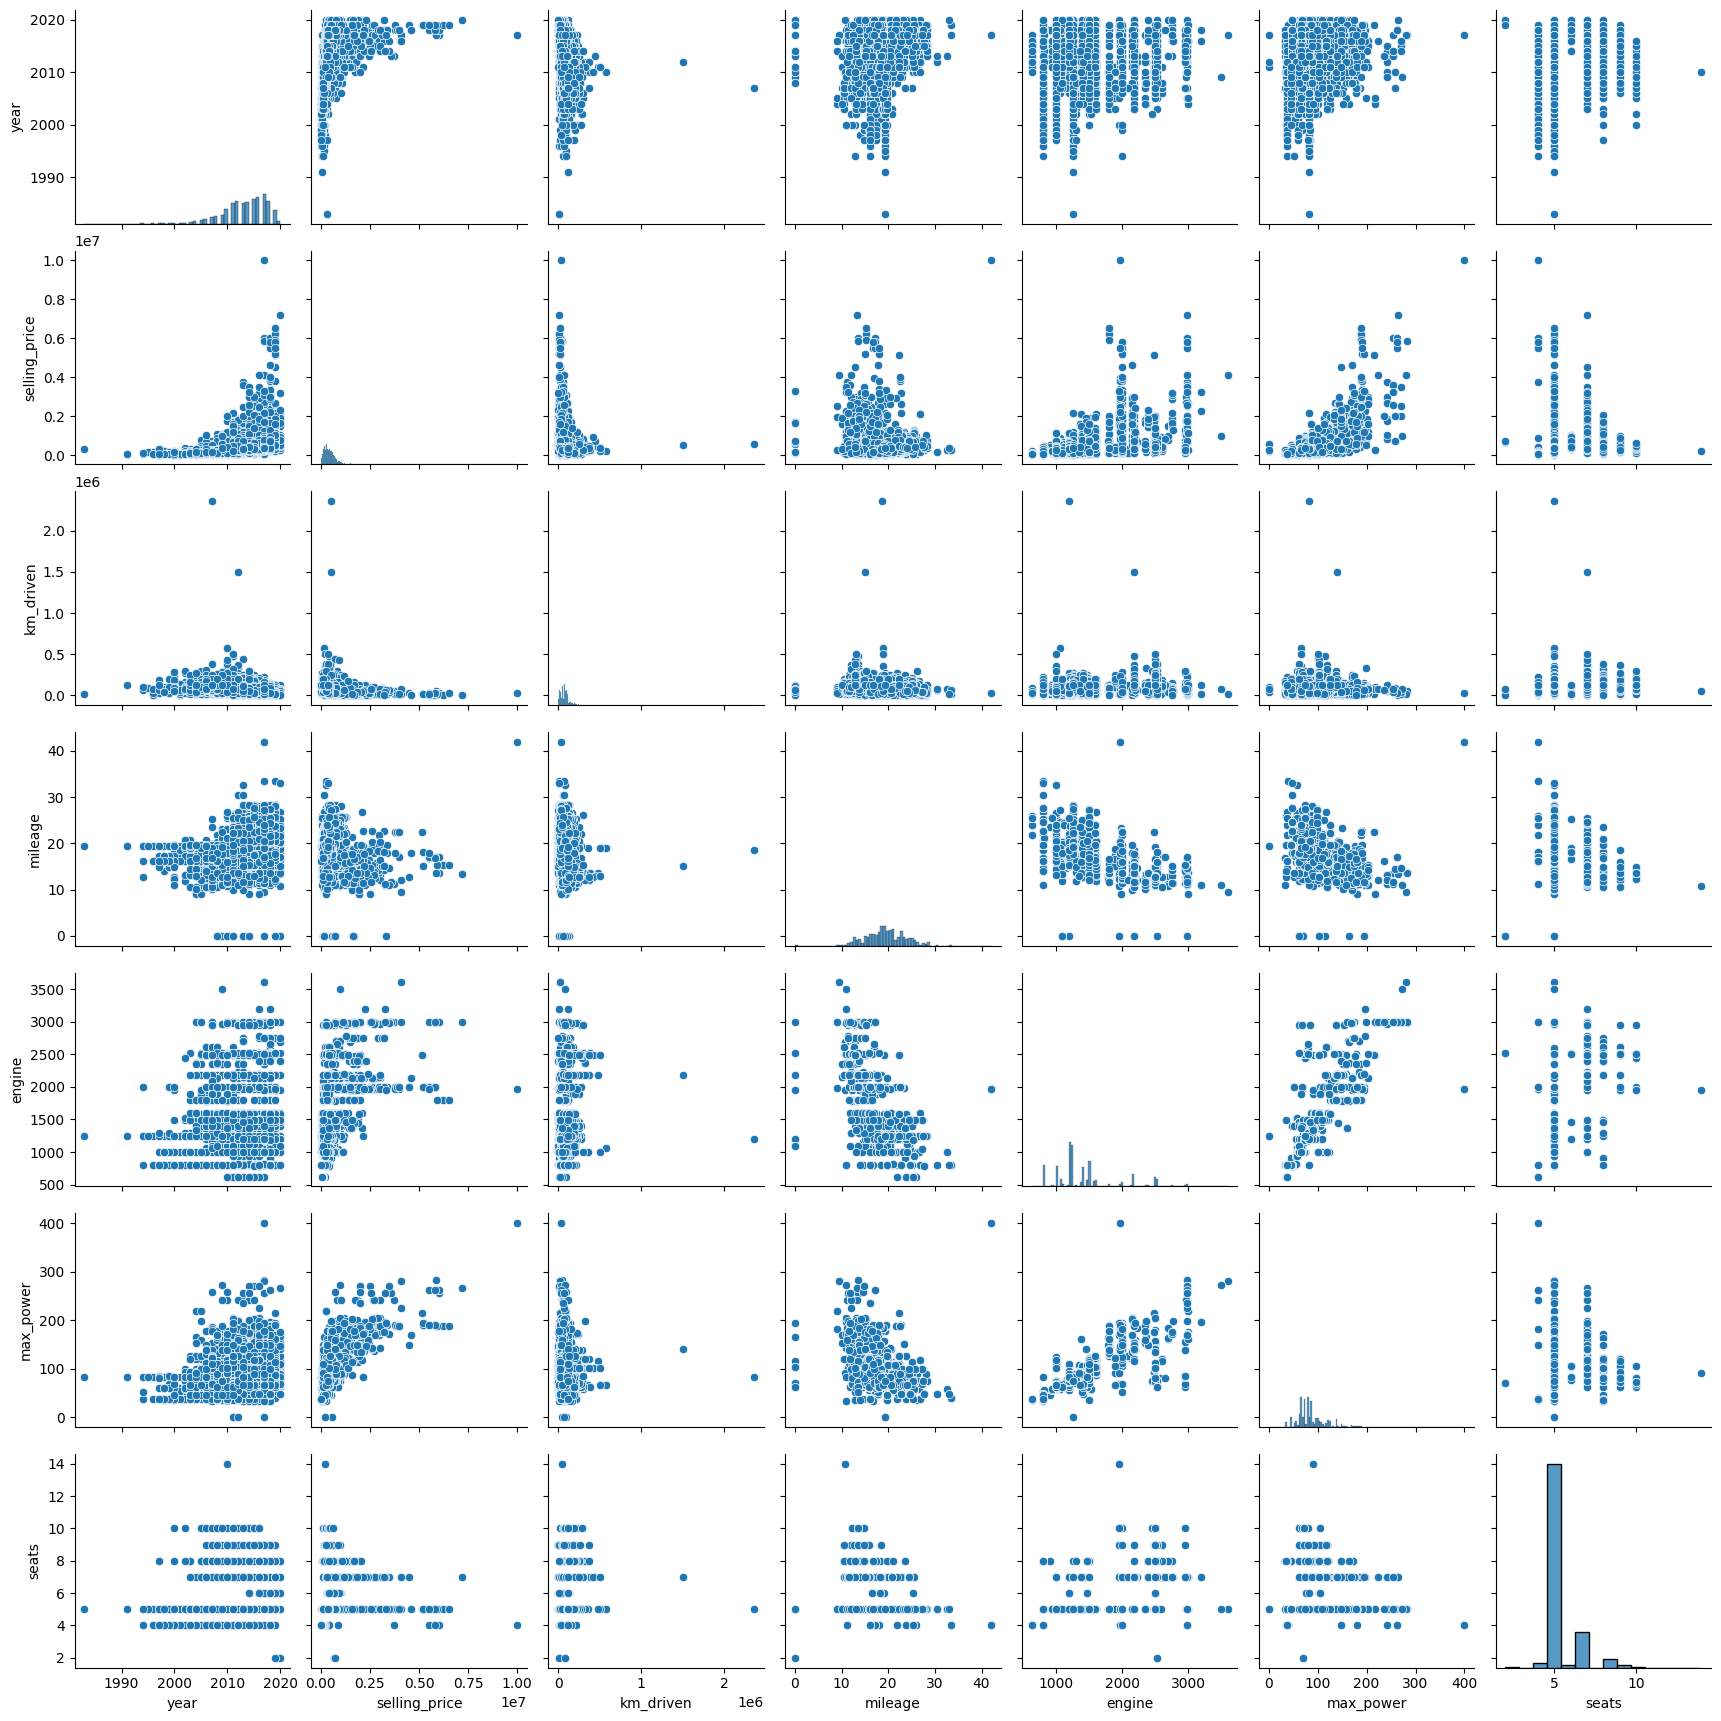

In [27]:
# your code here
sns.pairplot(df_train)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

**Ответ**

**1.** Можно заметить следующие свзи предикторов с целевой переменной - цена автомобиля:
 - С увеличением пробега (km_driven) цена машины в среднем уменьшается.
 - С увеличением можности двигателя (max_power) цена машины имеет тенденцию увеличиваться.
 - Чем новее машина (больше значение года выпуска year), тем больше разброс в цене и доля дорогих машин увеличивается.

**2.** По графикам можно отметить, что наблюдается линейная зависимость между парами признаков max_power и engine.

In [28]:
corr_matrix = df_train[['seats','max_power','engine','mileage','km_driven','year','selling_price']].corr()


In [29]:
corr_matrix['selling_price'].sort_values(ascending=False)

selling_price    1.000000
max_power        0.692814
engine           0.447672
year             0.427279
seats            0.149953
mileage         -0.104769
km_driven       -0.164828
Name: selling_price, dtype: float64

**Вывод**: В качестве предикторов, которые наибольшим образом влияют на целевую переменную,  можно выделить max_power, engine и year, так как имеют большее значение коэффициента корреляции.

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

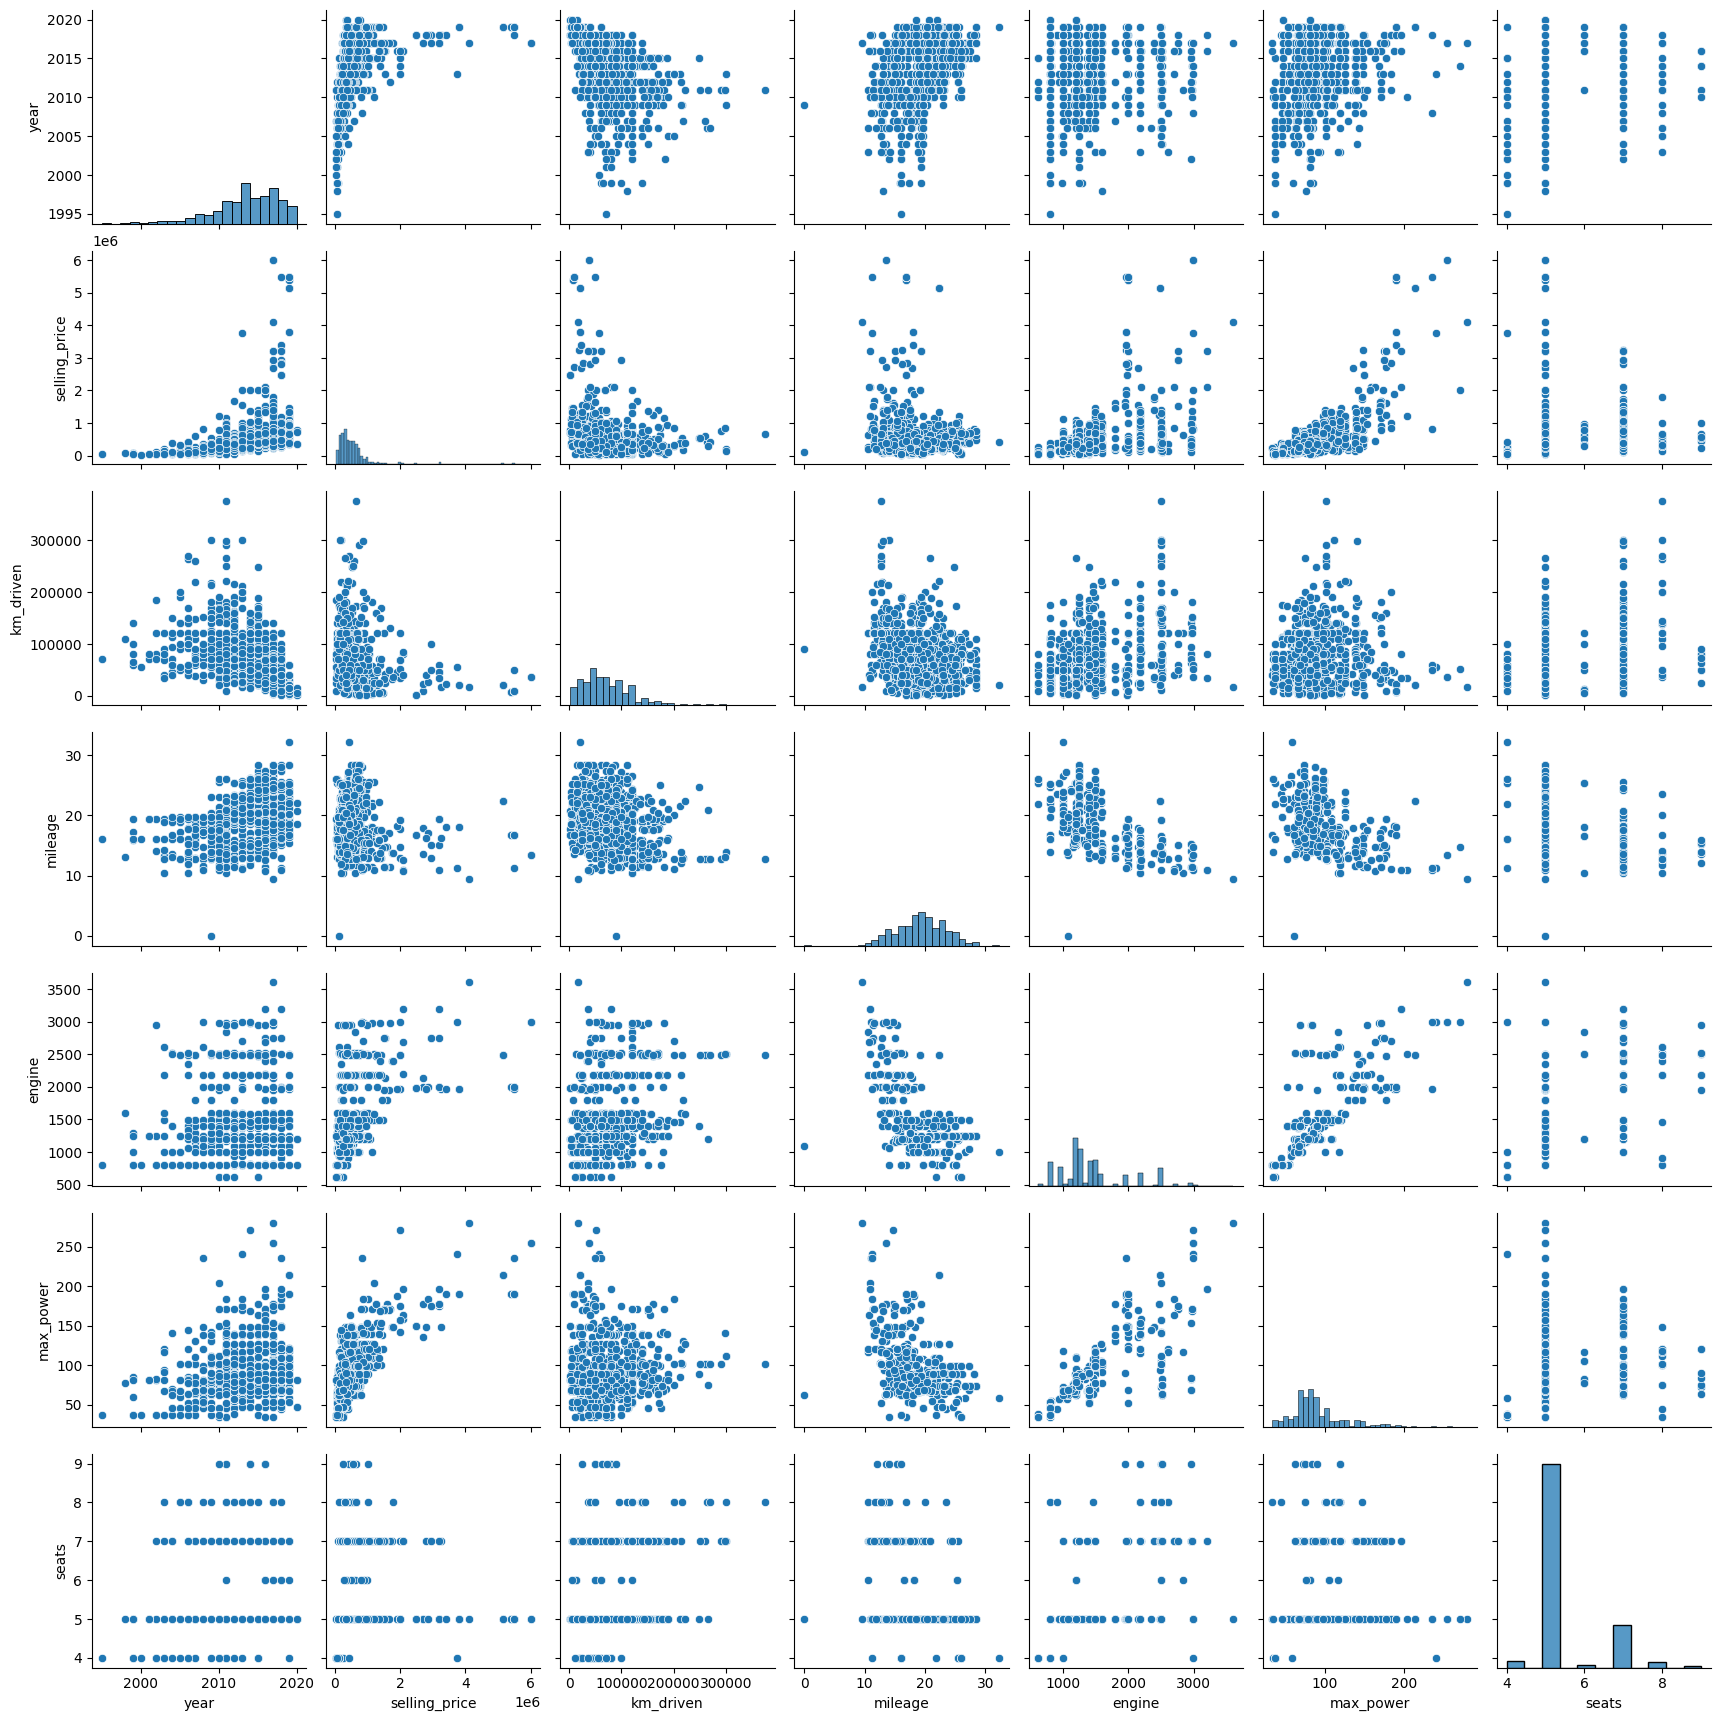

In [30]:
# your code here
sns.pairplot(df_test)

**Вывод**. Как видим, попарные распределения числовых признаков для трейна и теста оказались схожими.

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

<Axes: >

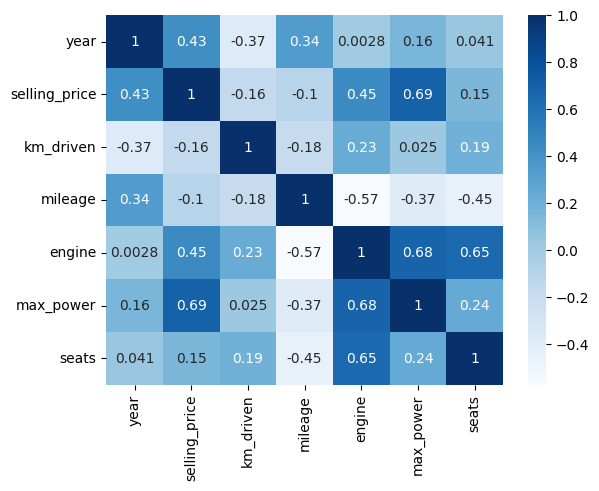

In [31]:
# your code here
import seaborn as sb
corr = df_train.corr(numeric_only=True)
sb.heatmap(corr, cmap="Blues", annot=True)

Ответьте, пожалуйста, на вопросы:
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

**Вывод**:

1. Наименее сколлерированными оказались признаки year и engine, значение 0,0028.
2. Наибольшую корреляцию имеют следующие пары признаков: Max_power и selling_price  (мощность и цена машины) - 0,69 Max_power и engine  (мощность и объем двигателя) - 0,68, seats и engine (количество сидений и объем двигателя) - 0,65.
3. Корреляция между признакими km_driven и year отрицательная, что дает основание предполагать, что чем больше пробег автомобиля, тем машина является более старой.

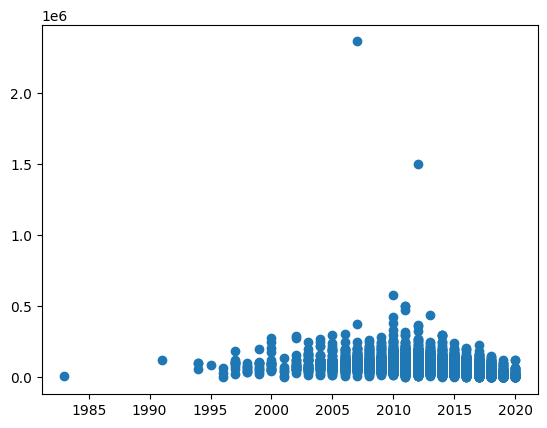

In [32]:
plt.scatter(df_train.year, df_train.km_driven);

**Дополнение к пункту 3**: Однако диаграмма рассеяния говорит о том, что не всегда корреляция между пробегом и годом машиня является отрицательной.

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

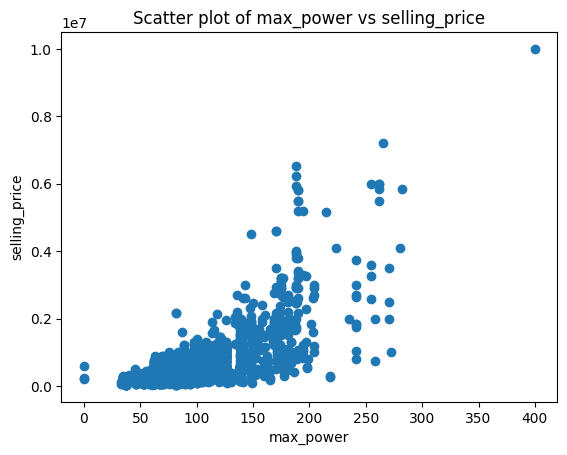

In [33]:
# your code here
plt.scatter(df_train.max_power, df_train.selling_price)
plt.xlabel('max_power')
plt.ylabel('selling_price')
plt.title('Scatter plot of max_power vs selling_price')
plt.show()

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

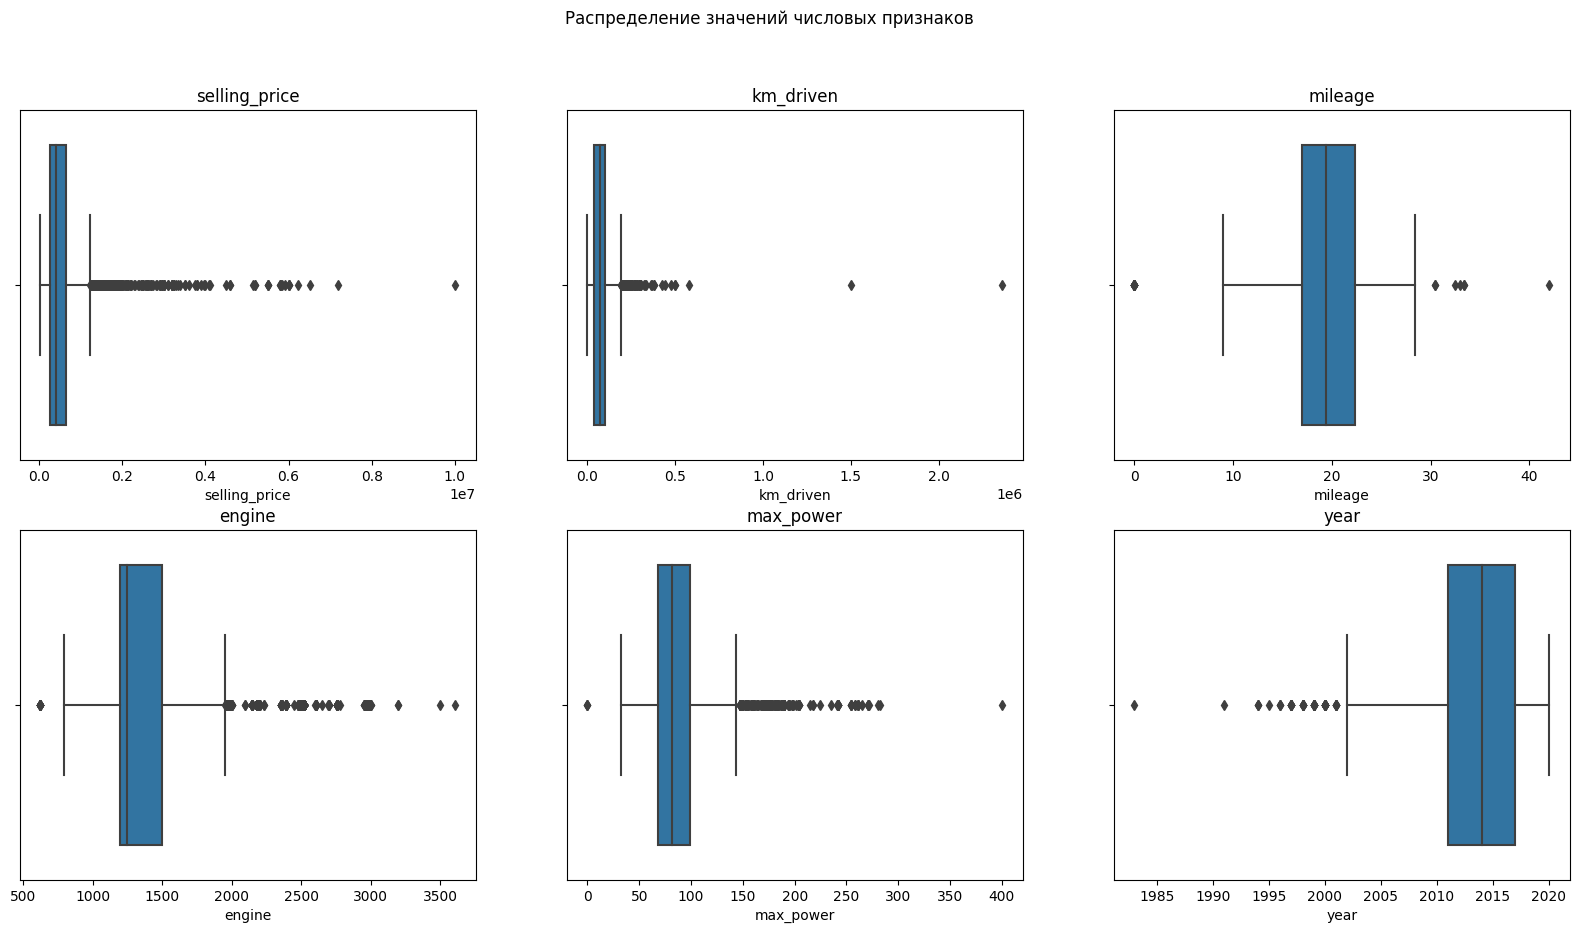

In [49]:
#Анализ выбросов в значениях признаков
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle("Распределение значений числовых признаков")

cols = ['selling_price','km_driven','mileage','engine','max_power','year']
for i in range (3):
  axes[0, i].set_title(cols[i])
  sns.boxplot(x=df_train[cols[i]], ax=axes[0, i])

for i in range (3):
  axes[1, i].set_title(cols[i+3])
  sns.boxplot(x=df_train[cols[i+3]], ax=axes[1, i])

plt.show()

In [50]:
# your code here
print('Наблюдается наличие выбросов в признаках selling_price, km_driven, mileage, year< max_power')

Наблюдается наличие выбросов в признаках selling_price, km_driven, mileage, year< max_power


Распределение цены показывает, что в основном машины имеют цену меньше 5000 000.

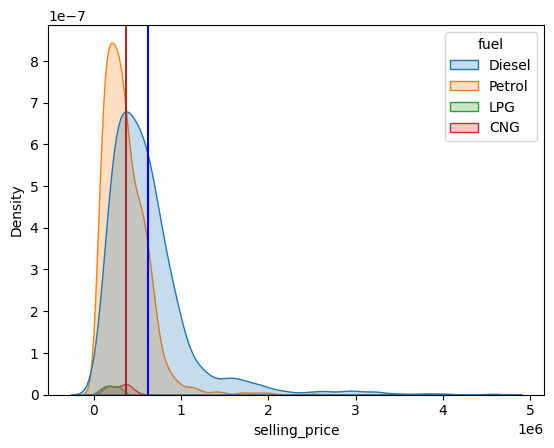

In [152]:
price_threshold = 5000000

sns.kdeplot(df_train[df_train['selling_price']<price_threshold],x='selling_price', hue='fuel',fill=True)
diesel_mean_price = df_train[(df_train['selling_price']<price_threshold) & (df_train['fuel']=='Diesel')]['selling_price'].mean()
petrol_mean_price = df_train[(df_train['selling_price']<price_threshold) & (df_train['fuel']=='Petrol')]['selling_price'].mean()
plt.axvline(x=diesel_mean_price, color='blue', label = 'diesel_mean')
plt.axvline(x=petrol_mean_price, color='brown', label = 'petrol_mean')
plt.show();

Больший раброс цены имеют машины с дизельным двигателем. Кроме того, средняя цена у машин с дизельным топливом выше.

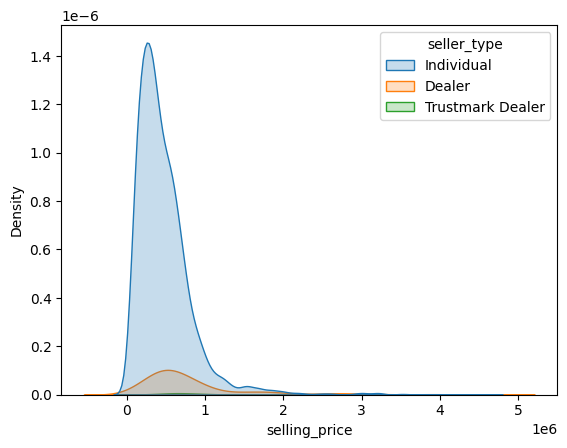

In [153]:
sns.kdeplot(df_train[df_train['selling_price']<price_threshold],x='selling_price', hue='seller_type',fill=True)
plt.show();

Больший раброс цены имеют машины, которые реализуются частными лицами.

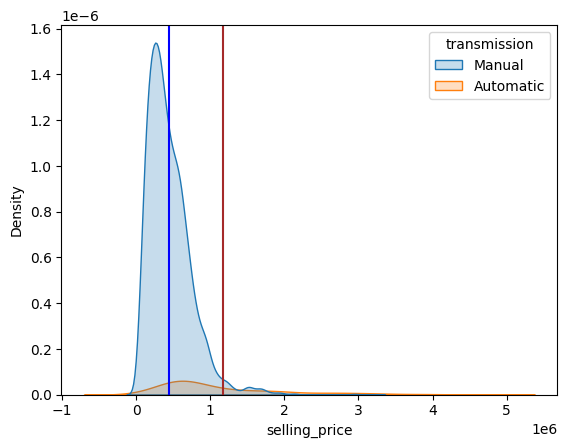

In [154]:
sns.kdeplot(df_train[df_train['selling_price']<price_threshold],x='selling_price', hue='transmission',fill=True)
manual_mean_price = df_train[(df_train['selling_price']<price_threshold) & (df_train['transmission']=='Manual')]['selling_price'].mean()
auto_mean_price = df_train[(df_train['selling_price']<price_threshold) & (df_train['transmission']=='Automatic')]['selling_price'].mean()
plt.axvline(x=manual_mean_price, color='blue')
plt.axvline(x=auto_mean_price, color='brown')
plt.show();

Машины с автоматической коробкой передач имеют более равномерное распределение цены, машины с ручной коробкой передач в среднем дешевле и распределение их цены смещено влево.

<ipython-input-155-96ddf7b1d927>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_train[df_train['selling_price']<price_threshold],x='selling_price', hue='owner',fill=True)


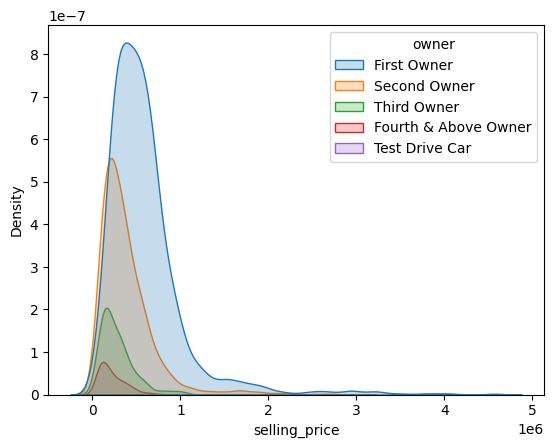

In [155]:
sns.kdeplot(df_train[df_train['selling_price']<price_threshold],x='selling_price', hue='owner',fill=True)
plt.show();

В зависимости от того, сколько владельцев было у машины распределение цены смещается. Чем меньше владельцев, тем в среднем цена на машину больше.

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [51]:
y_train = df_train.selling_price# your code here
y_test = df_test.selling_price
X_train = df_train.drop(['selling_price','name','seller_type','owner','fuel','transmission'], axis=1)# your code here
X_test = df_test.drop(['selling_price','name','seller_type','owner','fuel','transmission'], axis=1)# your code here
features = X_train.columns

In [54]:
assert X_train.shape == (5840, 6)

In [55]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# your code here
model = LinearRegression()
model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [ ]:
print(f'MSE для трейна равно {MSE(y_train, pred_train):.2f}')
print(f'MSE для теста равно {MSE(y_test, pred_test):.2f}')

print(f'r2 для трейна равно {r2_score(y_train, pred_train):.8f}')
print(f'r2 для теста равно {r2_score(y_test, pred_test):.8f}')

MSE для трейна равно 116874153930.03
MSE для теста равно 233298779730.45
r2 для трейна равно 0.59225917
r2 для теста равно 0.59414198


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [60]:
from sklearn.preprocessing import StandardScaler

# your code here
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
# your code here
model = LinearRegression()
model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [62]:
print(f'MSE для трейна равно {MSE(y_train, pred_train):.4f}')
print(f'MSE для теста равно {MSE(y_test, pred_test):.4f}')

print(f'r2 для трейна равно {r2_score(y_train, pred_train):.8f}')
print(f'r2 для теста равно {r2_score(y_test, pred_test):.8f}')

MSE для трейна равно 116874153930.0289
MSE для теста равно 233298779730.4496
r2 для трейна равно 0.59225917
r2 для теста равно 0.59414198


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [63]:
# your code here
weights = abs(model.coef_)
feature_weights = pd.DataFrame({'Feature': features, 'Weight': weights})
feature_weights.sort_values(by='Weight', ascending=False)

,Feature,Weight
4,max_power,322807.353259
0,year,152772.570846
3,engine,61178.494337
1,km_driven,44158.818520
2,mileage,28833.925778
5,seats,23209.132486


In [64]:
print(f'Наиболее информативным признаком является max_power с весом {model.coef_[4]:.4f}, то есть чем больше мощность двигателя, тем больше цена.')

Наиболее информативным признаком является max_power с весом 322807.3533, то есть чем больше пройденное расстояние, тем меньше цена.


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [65]:
from sklearn.linear_model import Lasso

# your code here
model_l1 = Lasso()
model_l1.fit(X_train,y_train)
pred_train_l1 = model_l1.predict(X_train)
pred_test_l1 = model_l1.predict(X_test)

In [66]:
print(f'MSE для трейна равно {MSE(y_train, pred_train_l1):.4f}')
print(f'MSE для теста равно {MSE(y_test, pred_test_l1):.4f}')

print(f'r2 для трейна равно {r2_score(y_train, pred_train_l1):.8f}')
print(f'r2 для теста равно {r2_score(y_test, pred_test_l1):.8f}')

MSE для трейна равно 116874153940.1429
MSE для теста равно 233299450599.1693
r2 для трейна равно 0.59225917
r2 для теста равно 0.59414081


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [67]:
weights = model_l1.coef_
feature_weights = pd.DataFrame({'Feature': features, 'Weight': weights})
feature_weights.sort_values(by='Weight')

,Feature,Weight
1,km_driven,-44157.689858
5,seats,-23206.255649
2,mileage,28832.043396
3,engine,61173.662409
0,year,152772.390214
4,max_power,322808.236919


In [71]:
print('С параметрами по умолчанию L1-регуляризации не удалось занулить веса, поскольку в данном случае веса имеют большой порядок.')

С параметрами по умолчанию L1-регуляризации не удалось занулить веса, поскольку в данном случае веса имеют большой порядок.


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [72]:
from sklearn.model_selection import GridSearchCV

# задаем словарь параметр: список перебираемых значений
params = {'alpha' : np.linspace(0.1, 35000, 1000)}

# первый параметр - модель, второй - словарь параметров, третий - число фолдов, четвертый - метрика
gs = GridSearchCV(Lasso(max_iter=1000), params, cv=10, scoring="r2")

gs.fit(X_train, y_train) # применяем метод к данным X, y (GridSearchCV сам разобъет данные на фолды)


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-01, 3.51349349e+01, 7.01698699e+01, 1.05204805e+02,
       1.40239740e+02, 1.75274675e+02, 2.10309610e+02, 2.45344545e+02,
       2.80379479e+02, 3.15414414e+02, 3.50449349e+02, 3.85484284e+02,
       4.20519219e+02, 4.55554154e+02, 4.90589089e+02, 5.25624024e+02,
       5.60658959e+02, 5.95693894e+02, 6.30728829e+02, 6...
       3.41941965e+04, 3.42292314e+04, 3.42642664e+04, 3.42993013e+04,
       3.43343362e+04, 3.43693712e+04, 3.44044061e+04, 3.44394410e+04,
       3.44744760e+04, 3.45095109e+04, 3.45445458e+04, 3.45795808e+04,
       3.46146157e+04, 3.46496507e+04, 3.46846856e+04, 3.47197205e+04,
       3.47547555e+04, 3.47897904e+04, 3.48248253e+04, 3.48598603e+04,
       3.48948952e+04, 3.49299301e+04, 3.49649651e+04, 3.50000000e+04])},
             scoring='r2')

Text(0, 0.5, 'Score')

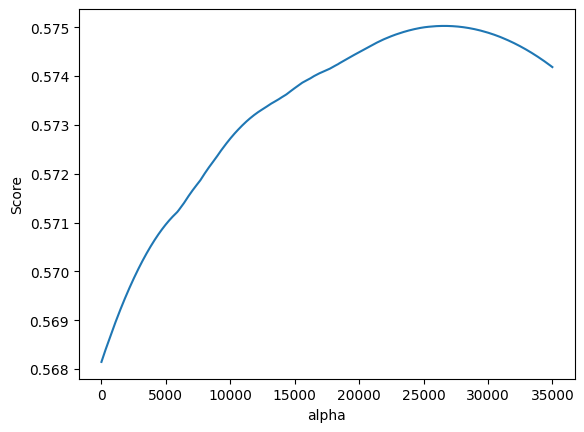

In [75]:
plt.plot(params['alpha'], gs.cv_results_["mean_test_score"])
plt.xlabel("alpha")
plt.ylabel("Score")

In [77]:
y_pred_train = gs.predict(X_train)
y_pred_test = gs.predict(X_test)

In [78]:
print(f'MSE для трейна равно {MSE(y_train, y_pred_train):.4f}')
print(f'MSE для теста равно {MSE(y_test, y_pred_test):.4f}')

print(f'r2 для трейна равно {r2_score(y_train, y_pred_train):.8f}')
print(f'r2 для теста равно {r2_score(y_test, y_pred_test):.8f}')

MSE для трейна равно 119646007341.9674
MSE для теста равно 250321876272.0456
r2 для трейна равно 0.58258896
r2 для теста равно 0.56452776


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

При использовании GridSearchCV с параметрами params из приведенного кода, где alpha принимает 1000 значений из интервала от 0.1 до 35000 с равным шагом, то есть params = {'alpha' : np.linspace(0.1, 35000, 1000)}. Всего будет обучено 1000 моделей, соответствующих каждому значению alpha из params.

Каждая модель обучается при использовании кросс-валидации с 10 фолдами из-за аргумента cv=10. Таким образом, для каждого значения alpha будет проведено 10 итераций кросс-валидации.

Таким образом, общее количество обученных моделей в данном случае будет составлять 1000 * 10 = 10000.

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [76]:
print(gs.best_score_) # качество наилучшей модели (с оптимальными гиперпараметрами)
print(gs.best_params_) # оптимальные гиперпараметры

0.575027472936639
{'alpha': 26591.615615615618}


In [80]:
weights = abs(gs.best_estimator_.coef_)
feature_weights = pd.DataFrame({'Feature': features, 'Weight': weights})
feature_weights.sort_values(by='Weight')

,Feature,Weight
2,mileage,0.000000
3,engine,0.000000
5,seats,0.000000
1,km_driven,15747.886854
0,year,145869.195846
4,max_power,321837.803254


In [81]:
print('Занулились веса у следующих признаков:')
feature_weights[feature_weights['Weight'] == 0]


Занулились веса у следующих признаков:


,Feature,Weight
2,mileage,0.0
3,engine,0.0
5,seats,0.0


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [82]:
from sklearn.linear_model import ElasticNet

# your code here
from sklearn.model_selection import GridSearchCV

# задаем словарь параметр: список перебираемых значений
params = {'alpha' : np.linspace(0.1, 1, 100),
'l1_ratio': np.linspace(0.1, 1, 10)}

# первый параметр - модель, второй - словарь параметров, третий - число фолдов, четвертый - метрика
gs = GridSearchCV(ElasticNet(), params, cv=10, scoring="r2")

gs.fit(X_train, y_train) # применяем метод к данным X, y (GridSearchCV сам разобъет данные на фолды)


GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.33636364, 0.345...
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272727,
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]),
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             scoring='r2')

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [84]:
# your code here
print(gs.best_score_) # качество наилучшей модели (с оптимальными гиперпараметрами)
print(gs.best_params_) # оптимальные гиперпараметры

0.5767736694233357
{'alpha': 0.7272727272727272, 'l1_ratio': 0.8}


In [85]:
y_pred_train = gs.predict(X_train)
y_pred_test = gs.predict(X_test)

In [86]:
print(f'MSE для трейна равно {MSE(y_train, y_pred_train):.4f}')
print(f'MSE для теста равно {MSE(y_test, y_pred_test):.4f}')

print(f'r2 для трейна равно {r2_score(y_train, y_pred_train):.8f}')
print(f'r2 для теста равно {r2_score(y_test, y_pred_test):.8f}')

MSE для трейна равно 118980071072.9792
MSE для теста равно 251496098629.4006
r2 для трейна равно 0.58491222
r2 для теста равно 0.56248503


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [87]:
# your code here
X_train_cat = df_train.drop(['selling_price','name'], axis=1)
X_test_cat = df_test.drop(['selling_price','name'], axis=1)

In [88]:
assert X_train_cat.shape == (5840, 10)

(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [89]:
from sklearn.preprocessing import OneHotEncoder
cat_cols = ['seats', 'fuel', 'seller_type', 'transmission', 'owner']
numerical_cols = ['year','km_driven','mileage','engine','max_power']
drop_enc = OneHotEncoder(drop='first', handle_unknown='ignore').fit(X_train_cat[cat_cols])
df_train_enc = pd.DataFrame(drop_enc.transform(X_train_cat[cat_cols]).toarray(),columns=drop_enc.get_feature_names_out(cat_cols))
df_test_enc = pd.DataFrame(drop_enc.transform(X_test_cat[cat_cols]).toarray(),columns=drop_enc.get_feature_names_out(cat_cols))


In [90]:
df_train_new = pd.concat([X_train_cat.drop(columns=cat_cols ), df_train_enc], axis=1)
df_test_new = pd.concat([X_test_cat.drop(columns=cat_cols ), df_test_enc], axis=1)

In [91]:
from sklearn.preprocessing import StandardScaler

# your code here
scaler = StandardScaler()
scaler.fit(df_train_new)
X_train_new = scaler.transform(df_train_new)
X_test_new = scaler.transform(df_test_new)

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge


# задаем словарь параметр: список перебираемых значений
params = {'alpha' : np.linspace(0.1, 10000, 1000)}

# первый параметр - модель, второй - словарь параметров, третий - число фолдов, четвертый - метрика
gs = GridSearchCV(Ridge(), params, cv=10, scoring="r2")

gs.fit(X_train_new, y_train) # применяем метод к данным X, y (GridSearchCV сам разобъет данные на фолды)

print(gs.best_score_) # качество наилучшей модели (с оптимальными гиперпараметрами)
print(gs.best_params_) # оптимальные гиперпараметры



0.6217917489471746
{'alpha': 630.7243243243244}


Text(0, 0.5, 'Score')

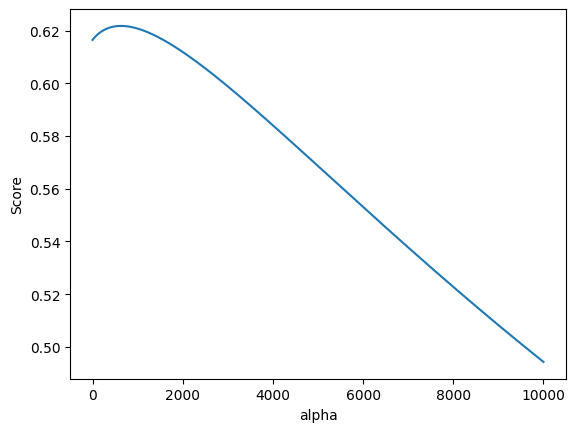

In [93]:
plt.plot(params['alpha'], gs.cv_results_["mean_test_score"])
plt.xlabel("alpha")
plt.ylabel("Score")

In [94]:
y_pred_train = gs.predict(X_train_new)
y_pred_test = gs.predict(X_test_new)

In [95]:
print(f'MSE для трейна равно {MSE(y_train, y_pred_train):.4f}')
print(f'MSE для теста равно {MSE(y_test, y_pred_test):.4f}')

print(f'r2 для трейна равно {r2_score(y_train, y_pred_train):.8f}')
print(f'r2 для теста равно {r2_score(y_test, y_pred_test):.8f}')

MSE для трейна равно 96673411823.9607
MSE для теста равно 223283428993.1251
r2 для трейна равно 0.66273384
r2 для теста равно 0.61156518


**Вывод**: Как видим, качество модели несколько улучшилось,значение r2 для теста стало равным 0.61156518 в отличие от предыдущего значения 0.56248503.

# Часть 4 - бонусная (1.5 балла) | Feature Engineering

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [96]:
# Создание новых признаков

# число "лошадей" на литр объема
df_train['power_per_engine'] = df_train['max_power']/df_train['engine']
df_test['power_per_engine'] = df_test['max_power']/df_test['engine']



In [97]:
#марка машины
df_train['brand'] = df_train['name'].str.split(' ').str.get(0)
df_test['brand'] = df_test['name'].str.split(' ').str.get(0)

In [98]:
df_train.drop(['name'],axis=1,inplace=True)
df_test.drop(['name'],axis=1,inplace=True)

In [100]:
# Кодирование признака Owner
df_train['owner'] = df_train['owner'].replace({'Test Drive Car': 0, 'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner':4})
df_test['owner'] = df_test['owner'].replace({'Test Drive Car': 0, 'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner':4})

In [101]:
df_train.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,power_per_engine,brand
0,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248,74.00,5,0.059295,Maruti
1,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498,103.52,5,0.069105,Skoda
2,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396,90.00,5,0.064470,Hyundai
3,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298,88.20,5,0.067951,Maruti
4,2017,440000,45000,Petrol,Individual,Manual,1,20.14,1197,81.86,5,0.068388,Hyundai




```
# Выбран кодовый формат
```

###Поиск выбросов и удаление выбросов

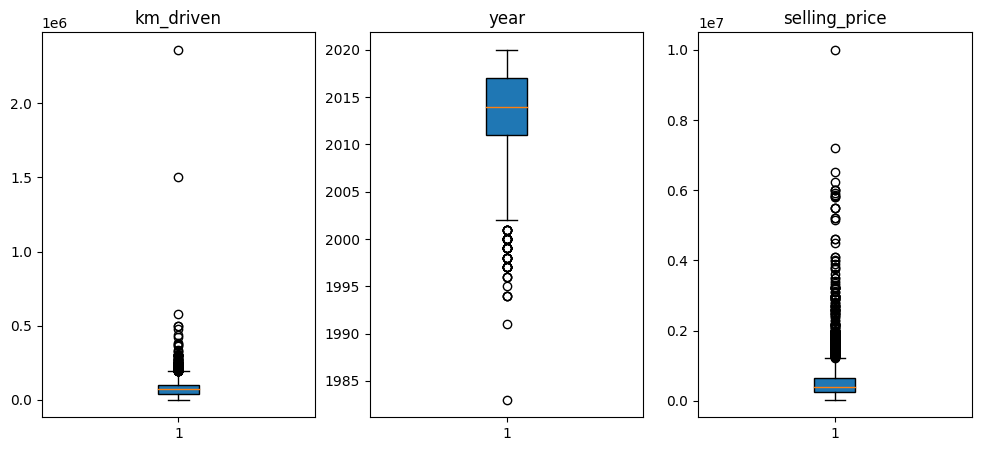

In [171]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))

# rectangular box plot
bplot1 = ax[0].boxplot(df_train['km_driven'],
                     vert=True, patch_artist=True)
ax[0].set_title('km_driven')

bplot2 = ax[1].boxplot(df_train['year'],
                     vert=True,  # vertical box alignment
                     patch_artist=True)
ax[1].set_title('year')

bplot2 = ax[2].boxplot(df_train['selling_price'],
                     vert=True,  # vertical box alignment
                     patch_artist=True)
ax[2].set_title('selling_price')

plt.show()

In [104]:
#Машины с большим пробегом
df_train[(df_train['km_driven']>1000000)]

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,power_per_engine,brand
1397,2012,500000,1500000,Diesel,Individual,Manual,1,15.1,2179,140.00,7,0.064250,Mahindra
2680,2007,550000,2360457,Petrol,Individual,Manual,2,18.6,1197,81.83,5,0.068363,Hyundai


In [105]:
#Отбросим машины с большим пробегом
drop_ind = df_train[(df_train['km_driven']>1000000)].index
df_train = df_train.drop(drop_ind,axis=0)
df_train.reset_index(drop=True, inplace=True)

In [106]:
#Машины очень старые
df_train[(df_train['year']<1994)]

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,power_per_engine,brand
274,1983,300000,10000,Diesel,Individual,Manual,3,19.37,1248,81.86,5,0.065593,Mahindra
3862,1991,55000,120000,LPG,Individual,Manual,2,19.37,1248,81.86,5,0.065593,Maruti


In [107]:
#Отбросим старые машины
drop_ind = df_train[(df_train['year']<1994)].index
df_train = df_train.drop(drop_ind,axis=0)
df_train.reset_index(drop=True, inplace=True)

In [113]:
#Машины очень дорогие
df_train[(df_train['selling_price']>9000000)]

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,power_per_engine,brand
151,2017,10000000,30000,Petrol,Individual,Automatic,1,42.0,1969,400.0,4,0.203149,Volvo


In [114]:
#Отбросим дорогие машины
drop_ind = df_train[(df_train['year']>9000000)].index
df_train = df_train.drop(drop_ind,axis=0)
df_train.reset_index(drop=True, inplace=True)

In [108]:
df_train.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,power_per_engine,brand
0,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248,74.00,5,0.059295,Maruti
1,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498,103.52,5,0.069105,Skoda
2,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396,90.00,5,0.064470,Hyundai
3,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298,88.20,5,0.067951,Maruti
4,2017,440000,45000,Petrol,Individual,Manual,1,20.14,1197,81.86,5,0.068388,Hyundai


Посмотрим на распределение цены

<Axes: xlabel='selling_price', ylabel='Density'>

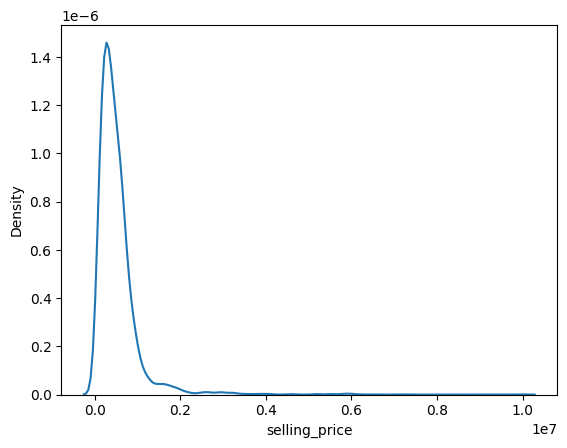

In [172]:
sns.kdeplot(df_train['selling_price'])

Распределение смещено влево, значит, логарифмирование должно улучшить распределение.

<Axes: xlabel='selling_price', ylabel='Density'>

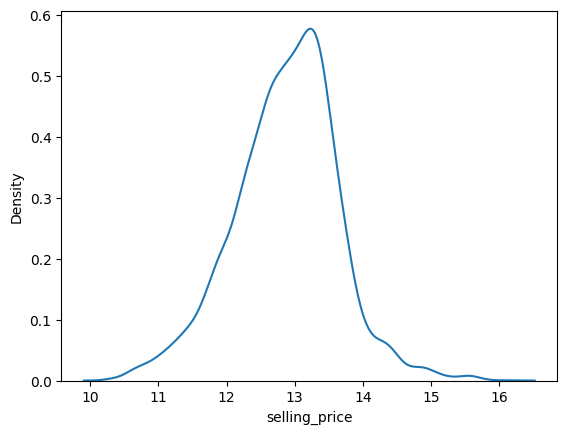

In [173]:
sns.kdeplot(np.log(df_train['selling_price']))

Видим, что распределение становится более похожим на нормальное.

In [115]:
y_train_original = df_train['selling_price']
y_test_original = df_test['selling_price']

In [116]:
y_train = np.log(y_train_original)
y_test = np.log(y_test_original)

In [117]:
X_train = df_train.drop(columns=["selling_price"])
X_test = df_test.drop(columns=["selling_price"])

In [ ]:
X_train.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,power_per_engine,brand
0,2014,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0,0.059295,Maruti
1,2014,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0,0.069105,Skoda
2,2010,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0,0.064470,Hyundai
3,2007,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0,0.067951,Maruti
4,2017,45000,Petrol,Individual,Manual,1,20.14,1197.0,81.86,5.0,0.068388,Hyundai


## Кодирование категориальных признаков

In [118]:
#Кодирование категориальных признаков
from sklearn.preprocessing import OneHotEncoder
cat_cols = ['seats', 'fuel', 'seller_type', 'transmission', 'brand']
drop_enc = OneHotEncoder(drop='first', handle_unknown='ignore').fit(X_train[cat_cols])
df_train_enc = pd.DataFrame(drop_enc.transform(X_train[cat_cols]).toarray(),columns=drop_enc.get_feature_names_out(cat_cols), dtype=int)
df_test_enc = pd.DataFrame(drop_enc.transform(X_test[cat_cols]).toarray(),columns=drop_enc.get_feature_names_out(cat_cols), dtype=int)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [119]:
#Сохранение параметров модели
with open("Encoder.pickle", "wb") as f:
    pickle.dump(drop_enc, f)

In [120]:
X_train= pd.concat([X_train.drop(columns=cat_cols), df_train_enc], axis=1)
X_test = pd.concat([X_test.drop(columns=cat_cols ), df_test_enc], axis=1)

In [121]:
#Масштабирование признаков
from sklearn.preprocessing import StandardScaler

# your code here
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [122]:
#Сохранение параметров модели
with open("Scaler.pickle", "wb") as f:
    pickle.dump(scaler, f)

In [123]:
from sklearn.linear_model import Ridge

# your code here
from sklearn.model_selection import GridSearchCV

# задаем словарь параметр: список перебираемых значений
params = {'alpha' : np.linspace(0.1, 1000, 100)}

# первый параметр - модель, второй - словарь параметров, третий - число фолдов, четвертый - метрика
gs = GridSearchCV(Ridge(), params, cv=10, scoring='r2')

gs.fit(X_train, y_train) # применяем метод к данным X, y (GridSearchCV сам разобъет данные на фолды)


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.000e-01, 1.020e+01, 2.030e+01, 3.040e+01, 4.050e+01, 5.060e+01,
       6.070e+01, 7.080e+01, 8.090e+01, 9.100e+01, 1.011e+02, 1.112e+02,
       1.213e+02, 1.314e+02, 1.415e+02, 1.516e+02, 1.617e+02, 1.718e+02,
       1.819e+02, 1.920e+02, 2.021e+02, 2.122e+02, 2.223e+02, 2.324e+02,
       2.425e+02, 2.526e+02, 2.627e+02, 2.728e+02, 2.829e...
       6.667e+02, 6.768e+02, 6.869e+02, 6.970e+02, 7.071e+02, 7.172e+02,
       7.273e+02, 7.374e+02, 7.475e+02, 7.576e+02, 7.677e+02, 7.778e+02,
       7.879e+02, 7.980e+02, 8.081e+02, 8.182e+02, 8.283e+02, 8.384e+02,
       8.485e+02, 8.586e+02, 8.687e+02, 8.788e+02, 8.889e+02, 8.990e+02,
       9.091e+02, 9.192e+02, 9.293e+02, 9.394e+02, 9.495e+02, 9.596e+02,
       9.697e+02, 9.798e+02, 9.899e+02, 1.000e+03])},
             scoring='r2')

In [124]:
print(gs.best_score_) # качество наилучшей модели (с оптимальными гиперпараметрами)
print(gs.best_params_) # оптимальные гиперпараметры

0.885143556646441
{'alpha': 0.1}


In [125]:
y_pred_train = gs.predict(X_train)
y_pred_test = gs.predict(X_test)

In [126]:
from sklearn.metrics import r2_score, mean_squared_error as MSE

print(f'MSE для трейна равно {MSE(y_train, y_pred_train):.4f}')
print(f'MSE для теста равно {MSE(y_test, y_pred_test):.4f}')

print(f'r2 для трейна равно {r2_score(y_train, y_pred_train):.10f}')
print(f'r2 для теста равно {r2_score(y_test, y_pred_test):.10f}')

MSE для трейна равно 0.0641
MSE для теста равно 0.0589
r2 для трейна равно 0.8903142414
r2 для теста равно 0.9176693042


In [127]:
y_pred_train_original = np.exp(gs.predict(X_train))
y_pred_test_original = np.exp(gs.predict(X_test))


In [129]:
from sklearn.metrics import r2_score, mean_squared_error as MSE

print(f'MSE для трейна равно {MSE(y_train_original, y_pred_train_original):.4f}')
print(f'MSE для теста равно {MSE(y_test_original, y_pred_test_original):.4f}')

print(f'r2 для трейна равно {r2_score(y_train_original, y_pred_train_original):.10f}')
print(f'r2 для теста равно {r2_score(y_test_original, y_pred_test_original):.10f}')

MSE для трейна равно 30037598627.6164
MSE для теста равно 44066994456.8231
r2 для трейна равно 0.8952622036
r2 для теста равно 0.9233388912


In [130]:
#Сохранение параметров модели для использования в реализации сервиса FastApi
with open("Model.pickle", "wb") as f:
    pickle.dump(gs, f)

**Вывод**. Как видим, проведенный Feature Engineering позволил существенно улучшить качество модели.

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [135]:
def business_metrics(y_true, y_pred):
    diff = np.abs(y_true - y_pred)
    relative_diff = 0.1 * y_true
    count = np.count_nonzero( diff <= relative_diff)
    return (count / len(y_true))

business_metrics(y_test_original, y_pred_test_original)


0.374

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
!pip install uvicorn

In [ ]:
!pip install FastAPI

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link